<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/OutlierExplore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Must Read**

**1. Project's Name**
```
การทำนายการกำเริบของโรคไตเรื้อรังด้วยเทคนิคการเรียนรู้ของเครื่อง
และการเรียนรู้เชิงลึก กรณีศึกษา:โรงพยาบาลศรีนครินทร์
```

**2. Objectives เพื่อสร้างโมเดลสำหรับการทำนายความคืบหน้าของโรค (chronic kidney disease progression)**

```
    ทำนายว่า ➡ ผู้ป่วยจะมีอัตราการเปลี่ยนแปลงของค่า slope of eGFR (อัตราการเปลี่ยนแปลงของค่าการกรองของไต)
    จะเพิ่มขึ้น 📈 หรือ ลดลง 📉 อย่างไรบ้าง ภายในระยะเวลา 1 ปี
```

**3. สิ่งที่พี่จะให้เราทำเป็นหนึ่งในขั้นตอนการเตรียมข้อมูล คือ การสำรวจค่าผิดปกติในข้อมูล ❗**

```
    คือข้อมูลที่เราได้มาเป็น real world data ซึ่งมันมีความสกปรก + เละเทะ 😢 พอสมควร ซึ่งค่าผิดปกติพวกนี้ อาจเกิดจาก
    * computer error
    * human error
    ดังนั้น ก่อนที่จะสร้างโมเดลทำนายเราต้องทำการสำรวจค่าผิดปกติของแต่ละตัวแปรก่อน
```

###**Step1: Import File**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



    make sure that u already **Add shortCut ReseachMethod folder to your MyDrive**
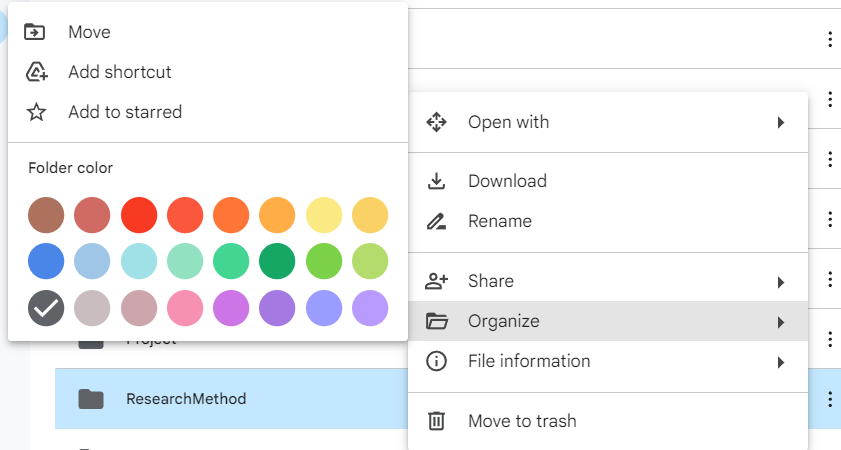

> **I already shared the drive of WideTable.xlsx file to you.
So I think, you can run this cell without any problem.**

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ResearchMethod/WideTable.xlsx')
df = df.iloc[:, 1:]
df.head()

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,eGFR_t1,time_t1,LabLocation,LabCwhen
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,NaN,215.0,81.0,123.0,99.0,NaN,63.60,2017-10-03 09:19:54.710,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,NaN,219.0,64.0,146.0,73.0,NaN,70.20,2018-12-12 09:18:49.913,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,5.3,193.0,62.0,129.0,65.0,NaN,64.02,2019-12-19 09:51:24.427,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,NaN,205.0,69.0,139.0,76.0,NaN,48.54,2021-03-04 10:01:42.113,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,5.5,198.0,74.0,129.0,60.0,NaN,80.47,2022-04-21 08:45:54.580,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037


> [**Data Dict**](https://docs.google.com/spreadsheets/d/1rTUT8Cdz4ZVIp9mJWfaWdKyS2l52DOTI7NqT_RyxpgE/edit?usp=sharing)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   G1M2:ARB                      52620 non-null  int64         
 4   G3M1:Statin                   52620 non-null  int64         
 5   G5M2:NSAIDs                   52620 non-null  int64         
 6   G1M5:Diuretic                 52620 non-null  int64         
 7   G1M7:Beta blocker             52620 non-null  int64         
 8   G1M3:Dihydropyridine CCB      52620 non-null  int64         
 9   G1M6:MRA                      52620 non-null  int64         
 10  G1M1:ACEI                     52620 non-null  int64         
 11  G2M2:Metformin              

#[**Step 2: Outlier Exploring**](https://docs.google.com/spreadsheets/d/1rTUT8Cdz4ZVIp9mJWfaWdKyS2l52DOTI7NqT_RyxpgE/edit?usp=sharing)

>**click on the header** you'll see the gg.sheet that represent the specific column

**1.** you have to **duplicate the code cell**. at the end, It must contain all the specific columns

```
check = df[' column L2 - L28']
```

**2.** **define the reference range** value แต่ละตัวแปร ค่าปกติต่างกัน เราจะกำหนดกรอบว่า ค่าปกติที่ควรจะเป็นของแต่ละคอลัมน์อมีค่าเท่าไหร่
```
reference_range = (a , b)
```

**3.** print out **the outlier frequency** มีค่าผิดปกตินอกเหนือจากนั้นอยู่ที่เท่าไหร่
ค่าได้เท่าไหร่ ไปเติมใน gg.sheet

Number of outliers: 11041


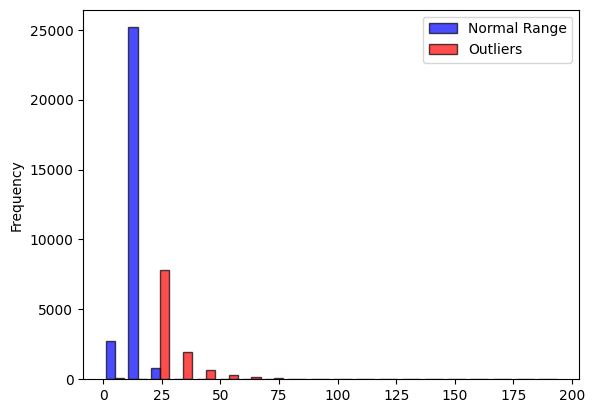

In [ ]:
import matplotlib.pyplot as plt
check = df['L2:BUN'] # you have to change column name
reference_range = (5, 20) # Define the reference range
outliers = (check < reference_range[0]) | (check > reference_range[1])

plt.hist([check[~outliers], check[outliers]], bins=20, color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

plt.ylabel('Frequency')
plt.legend()
plt.show()


Number of outliers: 3351


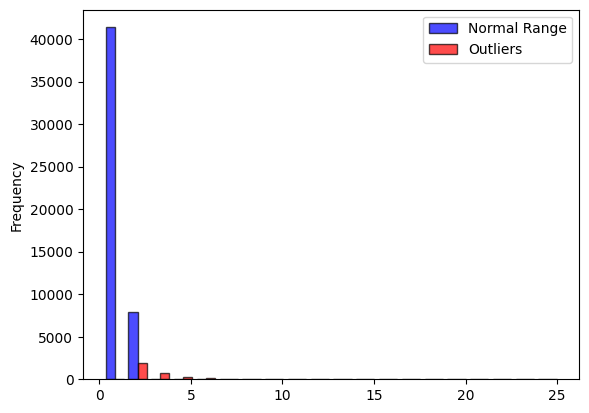

In [ ]:
import matplotlib.pyplot as plt
check = df['L3:Creatinine'] # you have to change column name
reference_range = (0.5, 2) # Define the reference range
outliers = (check < reference_range[0]) | (check > reference_range[1])

plt.hist([check[~outliers], check[outliers]], bins=20, color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

plt.ylabel('Frequency')
plt.legend()
plt.show()


Number of outliers: 457


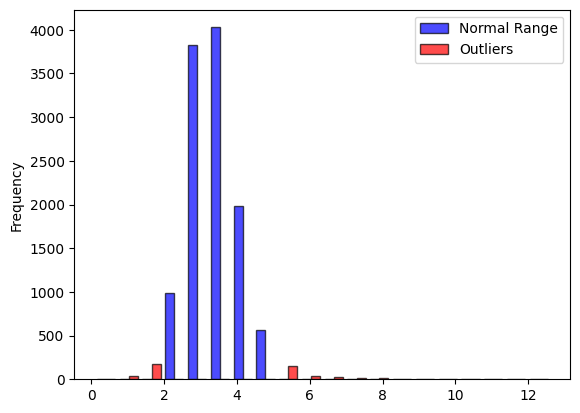

In [ ]:
import matplotlib.pyplot as plt
check = df['L10:Phosphorus'] # you have to change column name
reference_range = (2, 5) # Define the reference range
outliers = (check < reference_range[0]) | (check > reference_range[1])

plt.hist([check[~outliers], check[outliers]], bins=20, color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

plt.ylabel('Frequency')
plt.legend()
plt.show()
